# Deep Learning - Assignment 1




## Outline (15 points)
#### In this assignment, you will learn:
* How to generate random data using python.
* Building linear models for simple regression problem on the generated data.
* Training the linear models with gradient descent algorithm.
* How to alleviate over-fitting for your model.
* **Concepts** you will learn: ***Regularization***, ***Model selection***, ***Gradient descent***, ***Over-fitting***, ***Weight decay***, ***Training/Validation/Testing***.

#### Tasks
In this assignment, we are going to solve a basic linear regression problem by fitting a polynomial function, which we shall use as a running example to motivate a number of key concepts mentioned above. 
* **Part 1.** Generate training and testing data using python.
* **Part 2.** Linear regression with polynomials without regularization. 
* **Part 3.** Linear regression with polynomials with regularization.

#### Environment
Python 3.<br>
Other libraries should be installed correctly such as numpy, matplotlib, *etc*., according to the dependencies of the assignment. 

#### Database
* Randomly synthesized data.

## Part 1. Generate training and testing data using python
Suppose we observe a real-valued input variable $x$ and we wish to use this observation to predict the value of a real-valued target variable $t$. For the present purposes, it is instructive to consider an artificial example using synthetically generated data because we then know the precise process that generated the data for comparison against any learned model.

We therefore generate our training data which consists of 10 pairs of $\{x_i, y_i\}$ where $\{x_i\}$ are generated uniformly in range (0, 1), and the corresponding target values $\{y_i\}$ are obtained by first computing the corresponding values of the function $sin(2\pi x)$ and then adding random noise with a Gaussian distribution having standard deviation 0.3.
\begin{align*}
y_i = sin(2\pi x_i) + \varepsilon, \varepsilon\sim \mathcal{N}(0,\,0.3^{2}).
\end{align*}

The testing data is created the same way as training data but the number of pairs is 100, in order to give a more complete evaluation of the model to be trained. 

Please create the required training and testing data below and plot them. You could use numpy to create the data and matplotlib.pyplot to show them. 

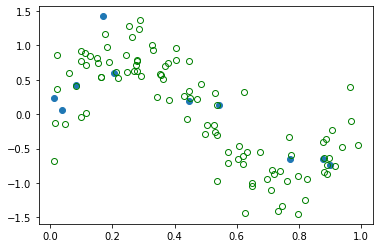

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 

# your code here
x_train = np.random.rand(10, 1)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, 0.3, (10, 1))

x_test = np.random.rand(100, 1)
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(0, 0.3, (100, 1))

plt.plot(x_train, y_train, marker='o', linestyle='none') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='none') 
plt.show()

## Part 2. Linear regression with polynomials without regularization
Congratulations if you generate the data correctly! However, to make sure all of you use the same data, we have generated it in advance. 

In [2]:
import pickle
with open('data/rawdata.pickle', 'rb') as f:
    data = pickle.load(f)
    
x_train = data['x_train']
y_train = data['y_train']

x_test = data['x_test']
y_test = data['y_test']

The task in this part is to train a linear model to fit the curve on the training data. Now that we have $\{x, y\}$, we consider using a polynomial function of the form 
\begin{align}
f(x, \pmb{w}) = \omega_0 + \omega_1x + \omega_2x^2 + ... + \omega_Mx^M = \sum_{j=0}^{M}\omega_jx^j,
\tag{1}
\end{align}
where $M$ is the *order* of the polynomial, and $x^j$ denotes $x$ raised to the power of j. The values of the coefficients will be determined by fitting the polynomial to the training data. To do so, we introduce the error function to be minimized:
\begin{equation}
E(\pmb{w}) = \frac{1}{2}\sum_{i=1}^{N}\{f(x_i, \pmb{w}) - y_i\}^2,
\tag{2}
\end{equation}
where, $N$ is 10 in our case.

First of all, to use matrix operation in this case, we re-write the polynomial function (1) in the form of matrix multiplication:
$$
\begin{bmatrix} 
f(x_1, \pmb{w}) \\ f(x_2, \pmb{w}) \\ . \\ . \\ . \\ f(x_N, \pmb{w})
\end{bmatrix} 
=
\begin{bmatrix} 
1 & x_1 & x_1^2 & . & . & . & x_1^M \\ 1 & x_2 & x_2^2 & . & . & . & x_2^M \\ . & . & . & . & . & . & . \\ . & . & . & . & . & . & . \\ . & . & . & . & . & . & . \\ 1 & x_N & x_N^2 & . & . & . & x_N^M
\end{bmatrix} 
\begin{bmatrix} 
\omega_0 \\ \omega_1 \\ . \\ . \\ . \\ \omega_M
\end{bmatrix}
$$
We call the first matrix on the right hand side feature matrix. We next build the feature matrix and try to solve above minimization problem using [`Gradient Descent Algorithm`](https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307) and the closed-form analytical solution. Because the result from the closed-form solution is theoretically optimal for the problem, by doing this, we could know how well our gradient descent algorithm performs by comparing the results using gradient descent and closed-form methods respectively. 

Anyway, I'll give an guidance using $M=3$ as following.

### Part 2.1. Method based on closed-form analysis
First, let's quickly solve this using the closed-form analytical solution. In this case, we luckily have this solution to solve the polynomial regression problem. However, in practical problems using deep learning models, which are non-linear and often very complex, there doesn't exist a closed-form solution or extremely difficult to find the solution analytically, the most common way is using gradient descent algorithm. 

In our case, we will first solve the regression problem using closed-form analysis to get the optimal solution, which can also be seen as the upper bound the gradient descent algorithm goes (because gradient descent algorithm will alwayse find an approximate solution which close to the optimal).

First, we calculate the feature matrix based on the matrix formulation and apply [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to solve the regression problem.

In [3]:
feature_matrix = np.ones_like(x_train)
M = 3
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)
    
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False).fit(feature_matrix, y_train)

Then, show the original training data points and the draw the curve of the function obtained on a single figure. 

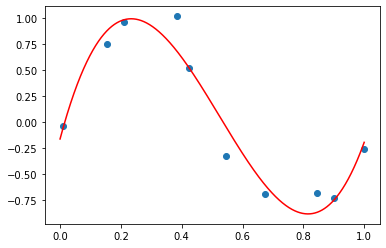

In [4]:
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = model.predict(features_curve)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

Now, we have got all the coefficients (noted as $\pmb{w}^*$) of the polynomial function by minimizing the error function (2). Therefore, we can evaluate the residual value of $E(\pmb{w}^*)$ given by (2) for the training and testing data. However, it is sometimes more convenient to use the *root-mean-square* (RMS) error defined by 
$$
E_{RMS} = \sqrt{2E(\pmb{w}^*)/N}
\tag{3}
$$
in which the division by $N$ allows us to compare different sizes of data sets on an equal footing, also with the same scale (and in the same units) as the target variable $y$. 

In order to evaluate the polynomial function we obtained, we do the following:
* Calculate and print the RMS error on training data based on equation (3),
* Calculate and print the RMS error on testing data based on equation (3),
* Get and print the coefficients of the trained function $\omega_0$ ~ $\omega_M$ using [`LinearRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [5]:
prediction_train = model.predict(feature_matrix)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)
for i in range(1, M+1):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
prediction_test = model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', model.coef_)

rms error on training data:  0.16066897173745506
rms error on testing data:  0.30943910311337297
coefficients of the trained function:  [[ -0.16311694  10.9380811  -30.08577056  19.11555865]]


### Part 2.2. Method based on Gradient Descent Algorithm
Once we get the closed-form solution, which is also the optimal solution, the next thing we are supposed to do is to re-solve the problem by gradient descent algorithm, because gradient descent matters a lot in practical applications since we cannot have a closed-form solution for most of the practical problems. Generally, the ingredients make up a gradient descent algorithm are:
* defining the learning rate to update our parameters,
* defining a loss function or objective function which you should minimize (here we use the error function based on equation (3)),
* calculating the gradients of parameters w.r.t. the loss,
* update parameters according to the learning rate and gradients to a direction that makes the loss smaller.

So, let's do this in that way.

In [6]:
# defining a learning rate, you could change it
learning_rate = 0.1

# initialize the parameters, here we simply assign each parameter to 1
# becuase M=3, so we totally have 4 parameters (w0, w1, w2, w3)
W = np.ones((M+1, 1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range(1, 4):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)

# iteratively do gradient descent, here we just iterate it 50 times
for i in range(50):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)

    # calculate the loss, print it every 10 iterations
    if i % 10 ==0:
        loss = 0.5 * np.sum((F - y_train) ** 2)
        print('loss: ', loss)

    # calcualte the gradients of the parameters
    # here we have 10 data samples, so we calculate the mean.
    # please understand this formulation by inferencing the gradients
    # by yourself with what you learnt in undergraduate school.
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1)

    # update parameters to a direction that makes the loss smaller
    # so we use '-' here, it is also why we call gradient "descent"
    W = W - learning_rate * G

loss:  34.380066478803926
loss:  4.012740605942455
loss:  2.436307391471592
loss:  1.958278267953077
loss:  1.6626874106866916


Again, we show the original training data points and the draw the curve of the function obtained on a single figure. 

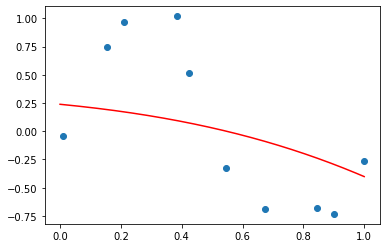

In [7]:
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

#y_curve = model.predict(features_curve)
y_curve = features_curve.dot(W)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

Also, in order to evaluate the polynomial function we obtained, we do the following:
* Calculate and print the RMS error on training data based on equation (3),
* Calculate and print the RMS error on testing data based on equation (3),
* Print the coefficients (parameters).

In [8]:
prediction_train = np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))
   
prediction_test = np.matmul(feature_matrix_test, W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', W)

rms error on training data:  0.5422276467732126
rms error on testing data:  0.5918422558573816
coefficients of the trained function:  [[ 0.23861297]
 [-0.26124322]
 [-0.24765614]
 [-0.13137266]]


#### Question 1. What's the difference between closed-form method and gradient descent method?  

#### Your answer:

### Part 2.3. Model selection with closed-form solution
There remains the problem of choosing the order $M$ of the polynomial, this is actually an example of the concept *model selection*. To see how changing $M$ affects the regression problem being solved, please change $M=$ from 1 to 9, and get the following objectives based on **closed-form analysis**:
* Draw all the 9 figures as done above (make sure the function curve and training data points are in the same figure for each case, using plt.subplots),
* Calculate all the error values using equation (3) with respect to trainig and testing data for all the 9 cases, and plot this values on a single figure (that means 18 points would be drawn in the figure, with x axis representing $M$ and y axis representing the error value, please use different colors to distinguish training and testing),
* Print the coefficients for the 9 polynomial functions. 


 Results when M = 1
rms error on training / testing data: 0.478388 / 0.484966
coefficients of the trained function:  [[ 0.79454616 -1.44141789]]

 Results when M = 2
rms error on training / testing data: 0.461018 / 0.493981
coefficients of the trained function:  [[ 0.55537648  0.06117962 -1.45333078]]

 Results when M = 3
rms error on training / testing data: 0.160669 / 0.309439
coefficients of the trained function:  [[ -0.16311694  10.9380811  -30.08577056  19.11555865]]

 Results when M = 4
rms error on training / testing data: 0.159394 / 0.310507
coefficients of the trained function:  [[ -0.18940812  11.75740862 -34.07877995  25.43571362  -3.14449788]]

 Results when M = 5
rms error on training / testing data: 0.112024 / 0.298416
coefficients of the trained function:  [[-7.92998629e-02  3.70865622e+00  3.12971770e+01 -1.56475755e+02
   2.02270285e+02 -8.10183758e+01]]

 Results when M = 6
rms error on training / testing data: 0.071934 / 0.342196
coefficients of the trained function

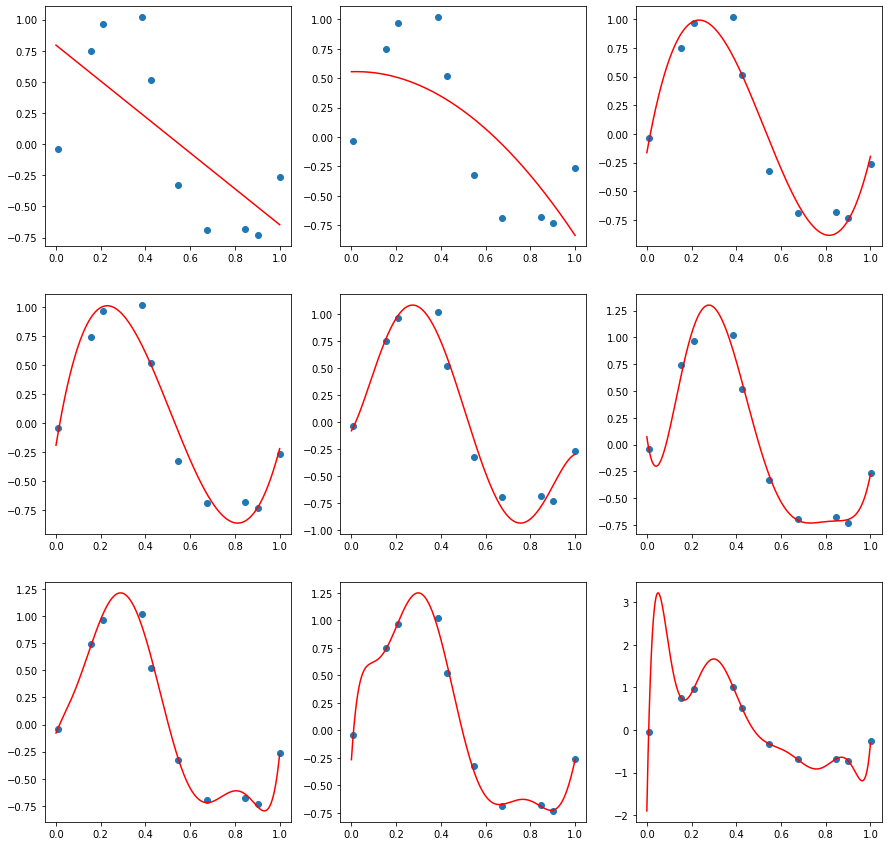

In [10]:
# your code here
rmss_train = []
rmss_test = []
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for M in range(1, 10):
    feature_matrix = np.ones_like(x_train)
    for i in range(1, M + 1):
        feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)

    model = LinearRegression(fit_intercept=False).fit(feature_matrix, y_train)
    x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
    features_curve = np.ones_like(x_curve)
    for i in range(1, M + 1):
        features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

    # your code here
    y_curve = model.predict(features_curve)
    row = (M-1) // 3
    col = (M-1) % 3
    ax[row,col].plot(x_train, y_train, marker='o', linestyle='None') 
    ax[row,col].plot(x_curve, y_curve, 'r')
    
    prediction_train = model.predict(feature_matrix)
    rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

    feature_matrix_test = np.ones_like(x_test)
    for i in range(1, M + 1):
        feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)

    prediction_test = model.predict(feature_matrix_test)
    rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))
    
    rmss_train.append(rms_train)
    rmss_test.append(rms_test)

    print('\n Results when M = %d' % M)
    print('rms error on training / testing data: %f / %f' % (rms_train, rms_test))
    print('coefficients of the trained function: ', model.coef_)

fig.tight_layout()
plt.show()
M_x = np.linspace(1, 9, 9)

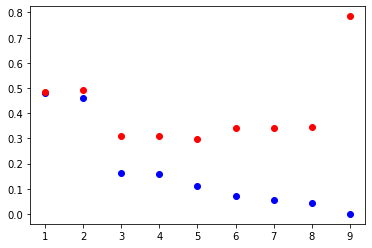

In [11]:
plt.plot(M_x, rmss_train, 'b', marker='o', linestyle='None')
plt.plot(M_x, rmss_test, 'r', marker='o', linestyle='None')
plt.show()

In fact, when $M = 9$, the 10 training points would be exactly fitted, and the training loss becomes zero, since the degree of freedom for this regression problem is 10. However, the fitted curve oscillates wildly and gives a very poor representation of the function $sin(2\pi x)$. This behavior is known as **over-fitting**. 
#### Question 2. Which one is the best one and why? Why the over-fitting happens when $M$ is big?

#### Your answer:


### Part 2.4. Gradient descent practice
Set $M=9$, based on **gradient descent algorithm**, do the following (During training, print the loss every $n$ iterations to show you are running the gradient descent algorithm to train the model, you could select a $n$ as you like):
* Change learning rate and see how fast the training converges,
* Change number of iteration to see whether the training loss would be smaller,
* Draw the figure as done above when you feel the training is good enough (make sure the function curve and training data points are in the same figure),
* Calculate the error values using equation (3) with respect to trainig and testing data,
* Print the coefficients (parameters) for the polynomial function. 

In [13]:
# your code here
# defining a learning rate
learning_rate = 0.1

# initialize the parameters, here we simply assign each parameter to 1
# becuase M=3, so we totally have 4 parameters (w0, w1, w2, w3)
W = np.ones((M+1, 1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)

# iteratively do gradient descent
for i in range(50):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)

    # calculate the loss
    if i % 10 ==0:
        loss = 0.5 * np.sum((F - y_train) ** 2)
        print('loss: ', loss)

    # calcualte the gradients of the parameters
    # here we have 10 data samples, so we calculate the mean.
    # please understand this formulation by inferencing the gradients
    # by yourself with what you learnt in undergraduate school.
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1)

    # update parameters to a direction that makes the loss smaller
    # so we use '-' here, it is also why we call gradient "descent"
    W = W - learning_rate * G

loss:  108.9576867114645
loss:  4.306569760761631
loss:  2.1385030210300267
loss:  1.5563558849819616
loss:  1.312244278798215


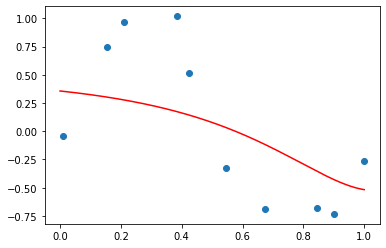

In [14]:
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

#y_curve = model.predict(features_curve)
y_curve = features_curve.dot(W)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

In [15]:
prediction_train = np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))
   
prediction_test = np.matmul(feature_matrix_test, W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', W)

rms error on training data:  0.48981780339698056
rms error on testing data:  0.5338034958265429
coefficients of the trained function:  [[ 0.35652297]
 [-0.29036022]
 [-0.34839046]
 [-0.27086086]
 [-0.17482634]
 [-0.08679106]
 [-0.01139232]
 [ 0.05213066]
 [ 0.10563873]
 [ 0.15094612]]


#### Question 3. Actually, when using gradient descent algorithm, even in the case that $M=9$, it is hard to observe the over-fitting phenomenon. It is because it's difficult to reach the theoretically optimal solution that makes the training loss zero. Regardless of over-fitting, please give your idea to make the training loss smaller when using gradient descent algorithm in this case.

#### Your answer:

## Part 3. Linear regression with polynomials with regularization
Before introducing regularization, let's think about a way to solve the over-fitting problem. <br>
Definitely, through the experiments done above, you somewhat have found that the most direct way is reducing $M$. However, what if we use more training data? 

### Part 3.1. Re-visit polynomial regression with extra training data and $M=9$
Finish this step as in Part 2.1 based on closed-form analysis. (*note*: please calculate the RMS error on the original training and testing data)

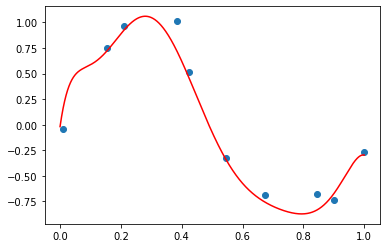

rms error on training data:  0.12703545085775667
rms error on testing data:  0.2946262714851294
coefficients of the trained function:  [[-1.83865513e-02  2.07504406e+01 -3.11916156e+02  2.43682755e+03
  -9.77774964e+03  2.15345964e+04 -2.71503685e+04  1.93217142e+04
  -7.04728868e+03  9.73155968e+02]]


In [17]:
with open('data/extradata.pickle', 'rb') as f:
    extra_data = pickle.load(f)
    
x_extra = extra_data['x_extra']
y_extra = extra_data['y_extra']

# your code here
x_extra_train = np.concatenate((x_train, x_extra), axis=0)
y_extra_train = np.concatenate((y_train, y_extra), axis=0)
feature_extra_matrix = np.ones_like(x_extra_train)
for i in range(1, 10):
    feature_extra_matrix = np.concatenate((feature_extra_matrix, x_extra_train ** i), axis=1)

model = LinearRegression(fit_intercept=False).fit(feature_extra_matrix, y_extra_train)

x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, 10):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)
y_curve = model.predict(features_curve)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

prediction_train = model.predict(feature_matrix)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

feature_matrix_test = np.ones_like(x_test)
for i in range(1, 10):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
prediction_test = model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', model.coef_)

#### Question 4. Does introducing more training data in this case alleviate over-fitting? Why? 

#### Your answer:


### Part 3.2. Re-visit polynomial regression with regularization and $M=9$
We may alleviate the over-fitting problem through introducing more training data, but what if there is no extra training data? In fact, we donnot want to limit the number of parameters in a model according to the size of the available training set, because it also limits the capacity and flexibility of the model. One technique that is often used to control over the over-fitting phenomenon in such cases is that of **regularization**, which involves adding a penalty term to the error function (2) in order to discourage the coefficients from reaching large values. The simplest such penalty term takes the form of a sum of squares of all of the coefficients, leading to a modified error function:
$$
\widetilde{E}(\pmb{w})=\frac{1}{2}\sum_{i=1}^{N}\{f(x_i, \pmb{w}) - y_i\}^2 + \frac{\lambda}{2}||\pmb{w}||^2
\tag{4}
$$
where $||\pmb{w}||^2\equiv \pmb{w}^T\pmb{w} = \omega_0^2 + \omega_1^2 + ... + \omega_M^2$, and the coefficient $\lambda$ governs the relative importance of the regularization term compared with the sum-of-squares error term. 

Again, this error function can be minimized exactly in closed form. The regression with such a quadratic regularizer is called *ridge regression*. In the context of neural networks, this approcah is known as **weight decay**. 

Apart from training and testing data, we also need another data set to test how suitable the $\lambda$ is before we use the model on the testing data. We call this data set **validation** set. Usually, when we have large amount of training data, we create a validation set splitted from the original training data and use the rest of the training data as the new training data. In our case, we only have the training data consisting of 10 data points, so here we use the extra data on Part 3.1 as the validation data. 

Please solve the ridge regression problem with the polynomial function using **training** data in the following 7 conditions:
* $M=9$, $ln\lambda=-35$ ($\lambda=e^{-35}$)
* $M=9$, $ln\lambda=-25$
* $M=9$, $ln\lambda=-20$
* $M=9$, $ln\lambda=-15$
* $M=9$, $ln\lambda=-10$
* $M=9$, $ln\lambda=-5$
* $M=9$, $ln\lambda=0$

with the following tasks:
1. Calculate the root-mean-square error based on (3) (not the modified one) on the **training** and **validation** set. Plot the curves of RMS error versus $\ln\lambda$ for training and validation set in a single figure (i.e., in this figure, two curves will be plotted, one for training data and one for validation data. x axis represents $\ln\lambda$ and y axis represents RMS error). 
2. Print the coefficients for the obtained 7 ploynomial functions.
3. Find the best value for $\lambda$ among these conditions (`best` means its corresponding RMS on the **validation** set is the smallest), calculate the corresponding RMS error on **testing** data and print it.
4. Draw the curve of the polynomial function in a figure w.r.t the best $\lambda$, in which the 10 original training data points and the 100 testing data points should also be plotted. 

To sovle the ridge regression problem, we could use [`sklearn.linear_model.Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html).


 Results when M = 9
coefficients of the trained function:  [[-1.85527244e+00  2.59421975e+02 -4.69104561e+03  3.69760213e+04
  -1.56453814e+05  3.88704718e+05 -5.85713669e+05  5.27038579e+05
  -2.60625856e+05  5.45071938e+04]]

 Results when M = 9
coefficients of the trained function:  [[-1.69163757e-01  1.78888436e+01 -2.19002445e+02  1.52139152e+03
  -5.00167220e+03  7.37823783e+03 -2.86918414e+03 -4.41016581e+03
   5.17415671e+03 -1.59175105e+03]]

 Results when M = 9
coefficients of the trained function:  [[-2.31216653e-02 -2.13131105e+00  7.50742982e+01 -2.05419682e+02
  -3.31928384e+01  4.53196107e+02 -1.21272788e+02 -3.64173543e+02
   1.47626746e+02  5.00411291e+01]]

 Results when M = 9
coefficients of the trained function:  [[-5.98034883e-02  1.19075969e+00  4.95863458e+01 -1.67536797e+02
   7.30500402e+01  1.40937023e+02  1.39463563e+01 -1.17264563e+02
  -1.04614018e+02  1.10486514e+02]]

 Results when M = 9
coefficients of the trained function:  [[ -0.12870047   8.68215515 

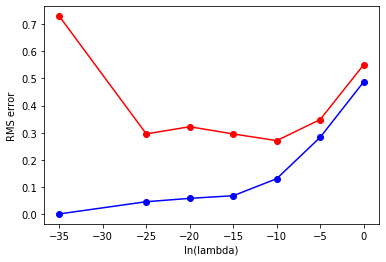

[0.7283582162308901, 0.29568873460924067, 0.3219866192631597, 0.29540646899506146, 0.2709016774687216, 0.34827183176578874, 0.5499714865661992]


In [18]:
# your code here
feature_matrix = np.ones_like(x_train)
for i in range(1, 10):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)
    
feature_matrix_valid = np.ones_like(x_extra)
for i in range(1, 10):
    feature_matrix_valid = np.concatenate((feature_matrix_valid, x_extra ** i), axis=1)
    
from sklearn.linear_model import Ridge

rmss_train = []
rmss_valid = []
best_model = None
best_valid = np.finfo(float).max

ln_lambdas = [-35, -25, -20, -15, -10, -5, 0]
for ln_lambda in ln_lambdas:
    model = Ridge(alpha=np.exp(ln_lambda), fit_intercept=False).fit(feature_matrix, y_train)

    prediction_train = model.predict(feature_matrix)
    rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))

    prediction_valid = model.predict(feature_matrix_valid)
    rms_valid = np.sqrt(np.sum((prediction_valid - y_extra) ** 2) / len(prediction_valid))
    
    rmss_train.append(rms_train)
    rmss_valid.append(rms_valid)
    
    print('\n Results when M = %d' % M)
    print('coefficients of the trained function: ', model.coef_)
    
    if rms_valid < best_valid:
        best_valid = rms_valid
        best_model = model

plt.plot(ln_lambdas, rmss_train, 'b', marker='o')
plt.plot(ln_lambdas, rmss_valid, 'r', marker='o')
plt.xlabel('ln(lambda)')
plt.ylabel('RMS error')
plt.show()
print(rmss_valid)

rms error on testing data:  0.2985770599475787


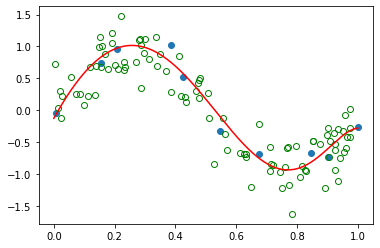

In [20]:
feature_matrix_test = np.ones_like(x_test)
for i in range(1, 10):
    feature_matrix_test = np.concatenate((feature_matrix_test, x_test ** i), axis=1)
    
prediction_test = best_model.predict(feature_matrix_test)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))
print('rms error on testing data: ', rms_test)
 
x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, 10):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

y_curve = best_model.predict(features_curve)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_test, y_test, fillstyle='none', marker='o', color='g', linestyle='None')
plt.plot(x_curve, y_curve, 'r')
plt.show()

#### Question 5. Does regularization alleviate over-fitting? Why? 

#### Your answer:


### Part 3.3. Gradient descent practice
Choose a $\lambda$ as you like and set $M=9$, calculate and print its rms error on training, validation and testing data respectively, draw the function curve with all the training and testing data on it, based on **gradient descent algorithm**.

***Note***: the loss function is equation (4), when calculating the gradients, remember to also consider the regularizatin component.

loss:  108.95791371111332
loss:  4.3063800148814595
loss:  2.1384421023453584
loss:  1.5563574493496695
loss:  1.312286313984547


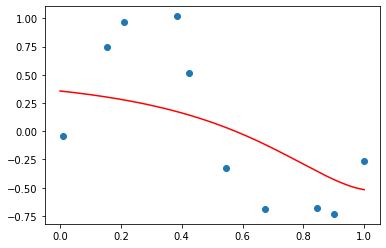

rms error on training data:  0.48982904235215746
rms error on testing data:  0.5338171622352773
coefficients of the trained function:  [[ 0.3564923 ]
 [-0.29031916]
 [-0.34834795]
 [-0.27083216]
 [-0.17481303]
 [-0.08679171]
 [-0.01140499]
 [ 0.05210775]
 [ 0.10560709]
 [ 0.15090703]]


In [22]:
# your code here
# your code here
# defining a learning rate
M = 9
learning_rate = 0.1
lmda = np.exp(-10)

# initialize the parameters, here we simply assign each parameter to 1
# becuase M=3, so we totally have 4 parameters (w0, w1, w2, w3)
W = np.ones((M+1, 1))

# calculate the feature matrix as before, in order to compute the loss
feature_matrix = np.ones_like(x_train)
for i in range(1, M+1):
    feature_matrix = np.concatenate((feature_matrix, x_train ** i), axis=1)

# iteratively do gradient descent
for i in range(50):
    # calculate the values of the polynomial function
    F = np.matmul(feature_matrix, W)

    # calculate the loss
    if i % 10 ==0:
        loss = 0.5 * np.sum((F - y_train) ** 2) + 0.5 * lmda * np.sum(W ** 2)
        print('loss: ', loss)

    # calcualte the gradients of the parameters
    # here we have 10 data samples, so we calculate the mean.
    # please understand this formulation by inferencing the gradients
    # by yourself with what you learnt in undergraduate school.
    G = np.mean((F - y_train) * feature_matrix, axis=0).reshape(-1, 1) + lmda * W

    # update parameters to a direction that makes the loss smaller
    # so we use '-' here, it is also why we call gradient "descent"
    W = W - learning_rate * G

x_curve = np.linspace(0, 1, 10000).reshape(-1, 1)
features_curve = np.ones_like(x_curve)
for i in range(1, M+1):
    features_curve = np.concatenate((features_curve, x_curve ** i), axis=1)

#y_curve = model.predict(features_curve)
y_curve = features_curve.dot(W)
plt.plot(x_train, y_train, marker='o', linestyle='None') 
plt.plot(x_curve, y_curve, 'r')
plt.show()

prediction_train = np.matmul(feature_matrix, W)
rms_train = np.sqrt(np.sum((prediction_train - y_train) ** 2) / len(prediction_train))
   
prediction_test = np.matmul(feature_matrix_test, W)
rms_test = np.sqrt(np.sum((prediction_test - y_test) ** 2) / len(prediction_test))

print('rms error on training data: ', rms_train)
print('rms error on testing data: ', rms_test)
print('coefficients of the trained function: ', W)